Sample code for AIRI400 Perceptron class.
The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [1]:
import numpy as np

In [2]:
weights = []
errors_log = []
epochs = 25
eta = 0.01
data = np.array([[3, 3, 1], [3.5, 2.5, 1], [1, 0.5, -1], [0.5, 0.75, -1], [2, 1.5, -1], [1.5, 2, -1], [2.3, 1.8, 1]])

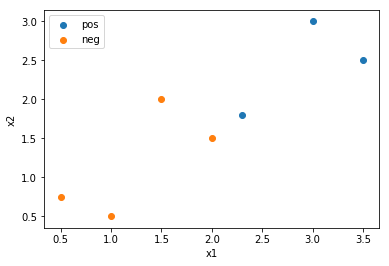

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = data[[data[:, 2] == 1]]
neg = data[[data[:, 2] == -1]]
plt.scatter(pos[:,0], pos[:, 1], label="pos")
plt.scatter(neg[:,0], neg[:, 1], label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2)

In [4]:
def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                errors += int(update != 0.0)
        errors_log.append(errors)
    return

In [5]:
def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

In [6]:
def predict(X):
    return np.where(net_input(X) > 0.0, 1, -1)

In [7]:
data[:, :2]

array([[ 3.  ,  3.  ],
       [ 3.5 ,  2.5 ],
       [ 1.  ,  0.5 ],
       [ 0.5 ,  0.75],
       [ 2.  ,  1.5 ],
       [ 1.5 ,  2.  ],
       [ 2.3 ,  1.8 ]])

In [8]:
data[:, :2].shape

(7, 2)

In [9]:
train(data[:, :2], data[:, 2], epochs=41)

Initial weights [ 0.  0.  0.]
EPOCHS 1
[ 3.  3.] target 1.0 sum 0.0 update 0.02
Updated WEIGHTS [ 0.02  0.06  0.06]
[ 3.5  2.5] target 1.0 sum 0.38 update 0.0
[ 1.   0.5] target -1.0 sum 0.11 update -0.02
Updated WEIGHTS [ 0.    0.04  0.05]
[ 0.5   0.75] target -1.0 sum 0.0575 update -0.02
Updated WEIGHTS [-0.02   0.03   0.035]
[ 2.   1.5] target -1.0 sum 0.0925 update -0.02
Updated WEIGHTS [-0.04  -0.01   0.005]
[ 1.5  2. ] target -1.0 sum -0.045 update 0.0
[ 2.3  1.8] target 1.0 sum -0.054 update 0.02
Updated WEIGHTS [-0.02   0.036  0.041]
EPOCHS 2
[ 3.  3.] target 1.0 sum 0.211 update 0.0
[ 3.5  2.5] target 1.0 sum 0.2085 update 0.0
[ 1.   0.5] target -1.0 sum 0.0365 update -0.02
Updated WEIGHTS [-0.04   0.016  0.031]
[ 0.5   0.75] target -1.0 sum -0.00875 update 0.0
[ 2.   1.5] target -1.0 sum 0.0385 update -0.02
Updated WEIGHTS [-0.06  -0.024  0.001]
[ 1.5  2. ] target -1.0 sum -0.094 update 0.0
[ 2.3  1.8] target 1.0 sum -0.1134 update 0.02
Updated WEIGHTS [-0.04   0.022  0.037]


In [10]:
print(errors_log)

[5, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0]


In [11]:
print(weights)

[-0.2    0.044  0.059]


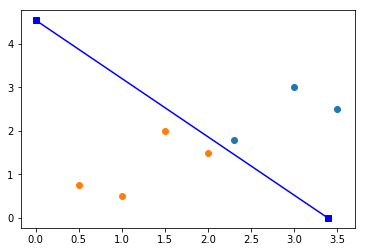

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
y_intercept = np.array([0, - weights[0] / weights[2]])
x_intercept = np.array([- weights[0] / weights[1], 0])
line, = ax.plot(y_intercept, x_intercept, 'bs-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], label="pos")
ax.scatter(neg[:,0], neg[:, 1], label="neg")

plt.show()

In [13]:
# gradient
print(- weights[1] / weights[2])

-0.745762711864


In [14]:
# y-intercept
print(- weights[0] / weights[2])

3.38983050847
